# Iris Classification Task

In [1]:
import pandas as pd

## Load data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)

### Explore the data

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

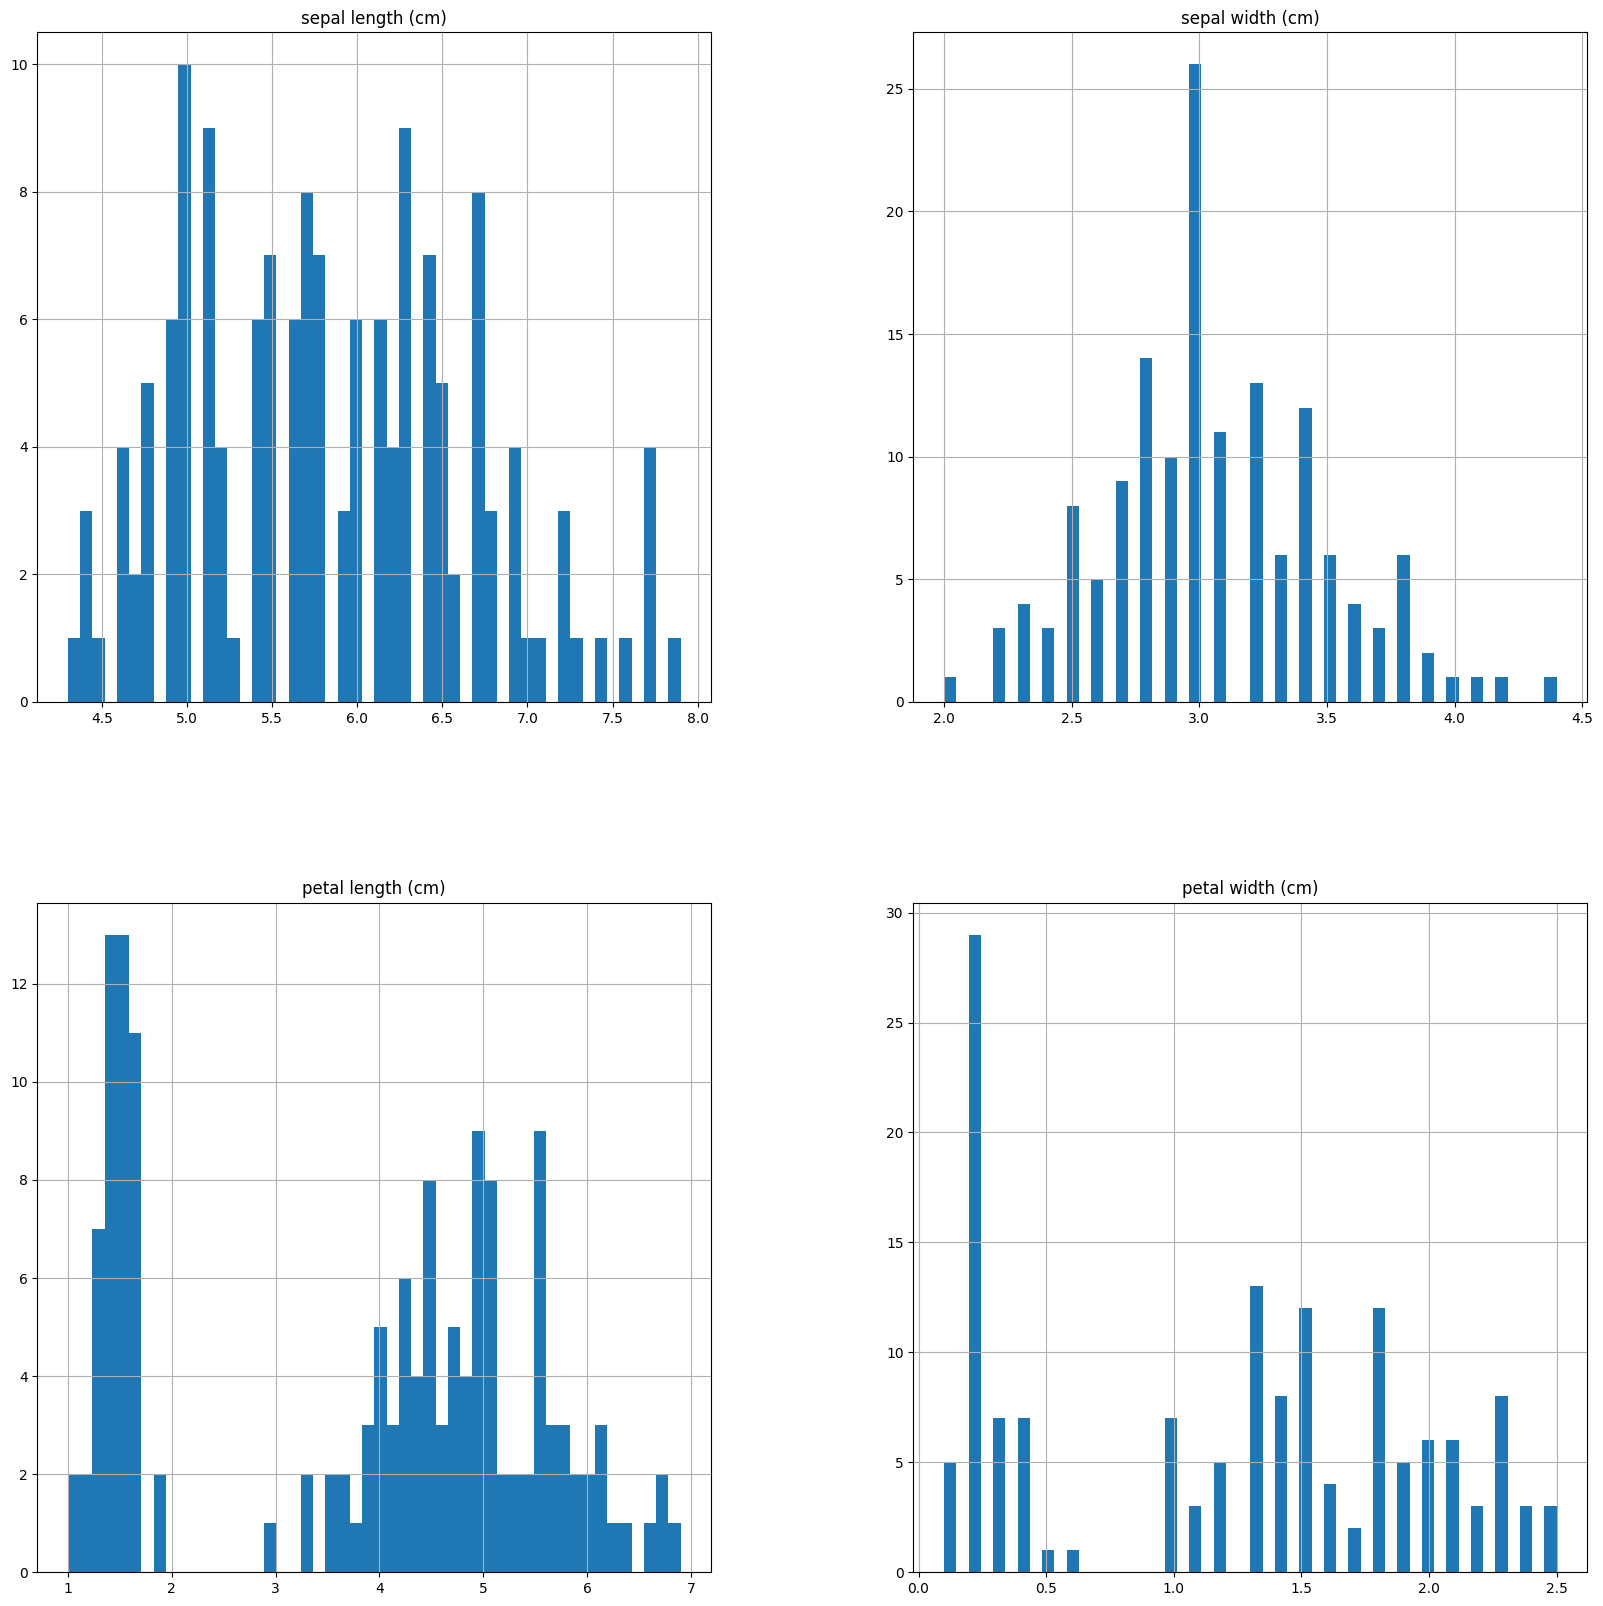

In [6]:
iris_df.hist(bins=50, figsize=(20, 20))

### Split train and test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv=3)

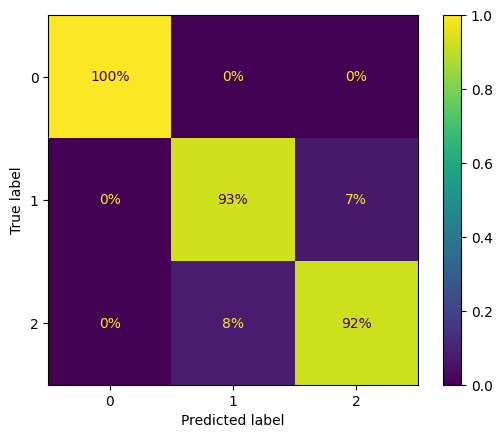

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize='true', values_format=".0%")

#### 

#### Use the GridSearch to fine-tune the model

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1, 2, 3, 4, 5],
          'weights': ['uniform', 'distance']}

gs = GridSearchCV(KNeighborsClassifier(), params, cv=3, scoring='f1_macro')

gs.fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [11]:
gs.best_score_

np.float64(0.9583368809422449)

### Evaluate the model

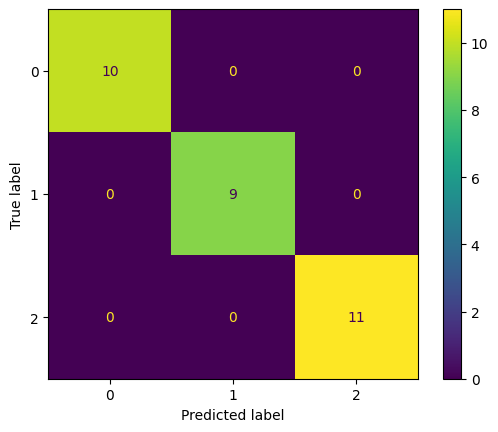

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
final_model = gs.best_estimator_
y_pred = final_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [13]:
f1, precision, recall

(np.float64(1.0), np.float64(1.0), np.float64(1.0))